In [1]:
import magcolloids as mgc
import os
import sys
import numpy as np
import pandas as pd
import scipy

#from multiprocessing import Pool
#import tqdm.auto as tqdm

sys.path.insert(0, '../icenumerics')
import icenumerics as ice
sys.path.insert(0, '../Analysis')
from importlib import reload  
import chirality as chi
reload(chi)

import matplotlib.pyplot as plt
from matplotlib import patches

# Statistical Chirality study

    In this script, the code used for the study of the chirality in the system is improved. The computational time is lower and the routines are shorter. 

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [3]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                             "ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.lammpstrj"),
                                                output = ["x","y","z","mux","muy","muz"]) 
    
bnd = load_obj.get_bounds()
trj = load_obj.read_trj()
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])   

In [9]:
col_trj.loc[:,["x","y"]].values

array([[  10.8655,   16.0461],
       [ -10.8655,   16.0461],
       [  10.8655,  -16.0461],
       ...,
       [ 880.688 , -834.336 ],
       [ 834.336 , -880.688 ],
       [ 880.688 , -880.688 ]], dtype=float32)

In [5]:
data_directory_1 = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts"

In [6]:
df = pd.read_csv(os.path.join(data_directory_1,"Pentagon_coordinates_Script-9.2.dat"), sep = '\t',index_col = [0])

In [7]:
df['dx'] = np.NaN
df['dy'] = np.NaN
df['dz'] = np.NaN
df['Chi'] = np.NaN

In [8]:
col_trj

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2   10.865500   16.046101  0.0 -8.66025 -5.00000 -0.0   
       1        2  -10.865500   16.046101  0.0  8.66025 -5.00000 -0.0   
       2        2   10.865500  -16.046101  0.0 -8.66025  5.00000 -0.0   
       3        2  -10.865500  -16.046101  0.0 -8.66025 -5.00000  0.0   
       4        2   30.305901   10.865500  0.0 -5.00000  8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
250000 1995     3  787.984009 -880.687988  0.0 -0.00000 -4.52580 -0.0   
       1996     3  834.335999 -834.335999  0.0 -0.00000 -4.52580 -0.0   
       1997     3  880.687988 -834.335999  0.0  4.52580  0.00000  0.0   
       1998     3  834.335999 -880.687988  0.0 -4.52580 -0.00000 -0.0   
       1999     3  880.687988 -880.687988  0.0  0.00000  4.52580  0.0   

                   cx        cy   cz  
frame  id                             
0      0    -4.330101 -2.500001  0.0  
       1     4.330101 -2.500001  0.0  
       2    -4.330101  2.500001  0.0  
       3    -4.330199 -2.500000  0.0  
       4    -2.500000  4.330199  0.0  
...               ...       ...  ...  
250000 1995  0.039978 -2.437988  0.0  
       1996  0.228027 -1.731995  0.0  
       1997  2.564026 -0.286987  0.0  
       1998 -2.380005  0.360962  0.0  
       1999 -0.179993  2.224976  0.0  

[5002000 rows x 10 columns]

In [76]:
df

,x,y,z,x_c,y_c,z_c,dx,dy,dz,Chi
pentagon index,,,,,,,,,,
0,30.305868,10.865525,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
0,30.305868,-10.865525,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
0,10.865525,16.046114,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
0,10.865525,-16.046114,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
0,0.000000,0.000000,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
799,818.289550,-891.553169,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN
799,850.381777,-891.553169,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN
799,834.335663,-880.687645,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN


In [165]:
pentagons = df.groupby("pentagon index").first().loc[:, ["x_c", "y_c"]].sort_index()
pentagons.index.name = "p"
pentagons


,x_c,y_c
p,,
0,18.289541,0.000000
1,-18.289541,0.000000
2,64.641522,-46.351981
3,28.062441,-46.351981
4,110.993503,0.000000
...,...,...
795,741.631701,-898.977185
796,880.687645,-816.046123
797,880.687645,-852.625204


In [108]:
col_frame = col_trj.loc[0].rename(columns={"x":"x_c","y":"y_c"}).sort_index()

In [109]:
%%time

p_tree = scipy.spatial.KDTree(pentagons.loc[:, ["x_c", "y_c"]].values)
p_in_sp = p_tree.query(col_frame.loc[:,["x_c","y_c"]].values, k = 2)[1]

CPU times: user 204 ms, sys: 0 ns, total: 204 ms
Wall time: 202 ms


In [116]:
%%time
s_tree = scipy.spatial.KDTree(col_frame.loc[:,["x_c","y_c"]].values)
sp_in_p = s_tree.query(pentagons.loc[:, ["x_c", "y_c"]].values, k = 5)[1]

CPU times: user 89.4 ms, sys: 3.93 ms, total: 93.3 ms
Wall time: 91.8 ms


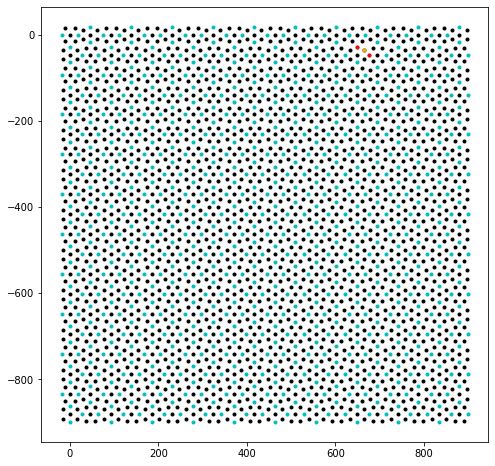

In [117]:
plt.figure(figsize=(8,8))

plt.plot(pentagons.x_c, pentagons.y_c, '.', color = "c")
plt.plot(col_frame.x_c, col_frame.y_c, '.', color = "k")

i = 120

plt.plot(pentagons.loc[p_in_sp[i]].x_c, pentagons.loc[p_in_sp[i]].y_c, '.', color = "red")
plt.plot(col_frame.loc[i].x_c, col_frame.loc[i].y_c, '.', color = "orange")

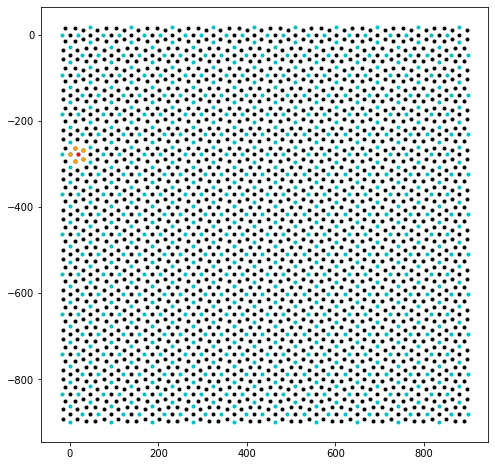

In [118]:
plt.figure(figsize=(8,8))

plt.plot(pentagons.x_c, pentagons.y_c, '.', color = "c")
plt.plot(col_frame.x_c, col_frame.y_c, '.', color = "k")

i = 120

plt.plot(pentagons.loc[i].x_c, pentagons.loc[i].y_c, '.', color = "red")
plt.plot(col_frame.loc[sp_in_p[i]].x_c, col_frame.loc[sp_in_p[i]].y_c, '.', color = "orange")

In [149]:
i = 0

spins = col_frame.loc[sp_in_p[i]]

pent_p = pentagons.loc[i]

r = spins.loc[:,["x_c","y_c"]]-pent_p
s = spins.loc[:,["dx","dy"]]
chi = np.sign(np.cross(r,s))

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


(-1.9596251551644752,
 34.55212825845398,
 -20.495973460615524,
 20.495973460615524)

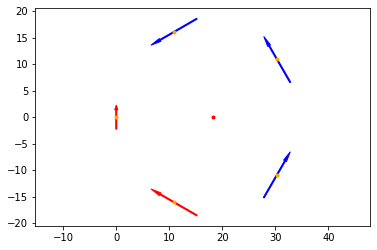

In [150]:
plt.plot(pentagons.loc[i].x_c, pentagons.loc[i].y_c, '.', color = "red")
plt.plot(col_frame.loc[sp_in_p[i]].x_c, col_frame.loc[sp_in_p[i]].y_c, '.', color = "orange")


for j in range(len(sp_in_p[i])):
    a = sp_in_p[i][j]
    
    arr = patches.Arrow(
        col_frame.loc[a].x_c-col_frame.loc[a].dx/2,
        col_frame.loc[a].y_c-col_frame.loc[a].dy/2,
        col_frame.loc[a].dx,
        col_frame.loc[a].dy, color = "r"*(chi[j]<0)+"b"*(chi[j]>0))
    
    plt.gca().add_patch(arr)

plt.axis("equal")

In [ ]:
# chirality(col_frame, pentagons)

In [163]:
# Something wrong here, we are iterating over the same pentagon!!

%%time
pentagons["Chi"] = np.NaN

for p, pent_p in pentagons.iterrows(): 
    
    spins = col_frame.loc[sp_in_p[i]]

    r = spins.loc[:,["x_c","y_c"]]-pent_p.loc[["x_c","y_c"]]
    s = spins.loc[:,["dx","dy"]]
    chi = np.sign(np.cross(r,s))
    
    pentagons.loc[p,"Chi"] = np.mean(chi)

CPU times: user 1.78 s, sys: 8.06 ms, total: 1.78 s
Wall time: 1.77 s


In [164]:
pentagons

,x_c,y_c,Chi
p,,,
0,18.289541,0.000000,0.2
1,-18.289541,0.000000,0.6
2,64.641522,-46.351981,-0.6
3,28.062441,-46.351981,0.2
4,110.993503,0.000000,-0.6
...,...,...,...
795,741.631701,-898.977185,-0.2
796,880.687645,-816.046123,-0.2
797,880.687645,-852.625204,-0.2


In [12]:
df.reset_index()

,pentagon index,x,y,z,x_c,y_c,z_c,dx,dy,dz,Chi
0,0,30.305868,10.865525,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
1,0,30.305868,-10.865525,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
2,0,10.865525,16.046114,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
3,0,10.865525,-16.046114,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
4,0,0.000000,0.000000,0.0,18.289541,0.000000,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3995,799,818.289550,-891.553169,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN
3996,799,850.381777,-891.553169,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN
3997,799,834.335663,-880.687645,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN
3998,799,850.381777,-869.822120,0.0,834.335663,-898.977185,1,NaN,NaN,NaN,NaN


In [10]:
%%time
i = 0
    
pentagons = chi.take_spin_all_pentagons(col_trj, df, frame = i)

CPU times: user 13.2 s, sys: 3.91 ms, total: 13.2 s
Wall time: 13.2 s


In [11]:
%%time
new_pentagons = chi.chirality(pentagons);

CPU times: user 4.32 s, sys: 0 ns, total: 4.32 s
Wall time: 4.32 s


CPU times: user 239 ms, sys: 11.8 ms, total: 251 ms
Wall time: 241 ms


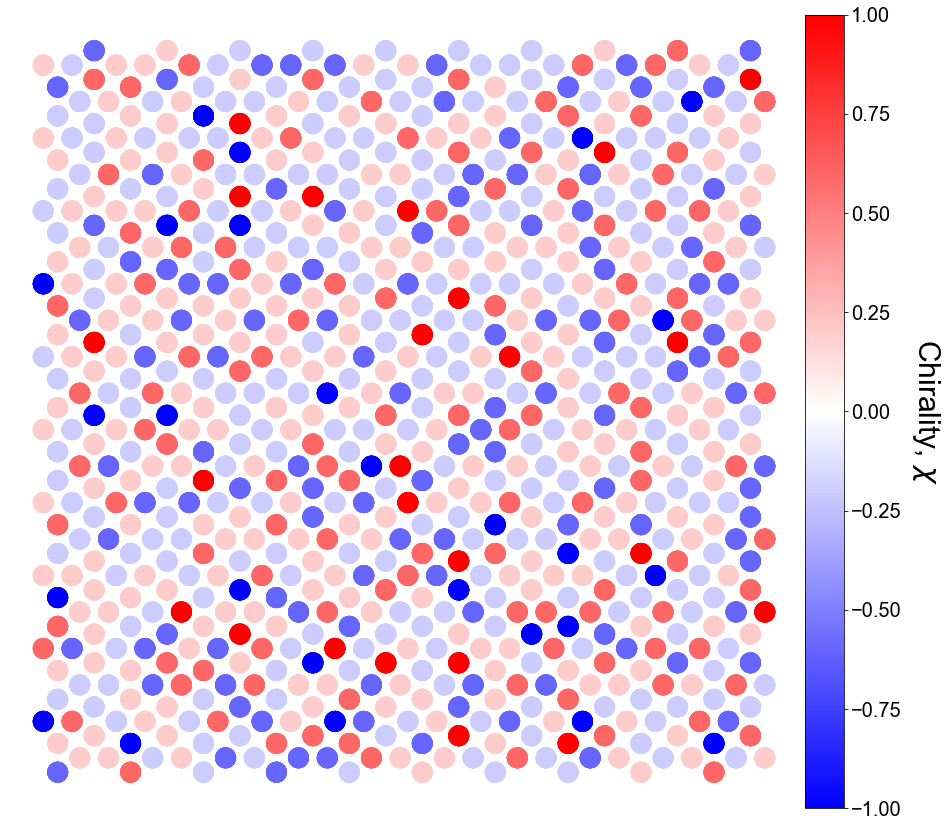

In [12]:
%%time
chi.plot_frame(new_pentagons, name ='ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0_frame-' , frame = str(i))

/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
../Analysis/chirality.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_pen['Chi'] = Chi


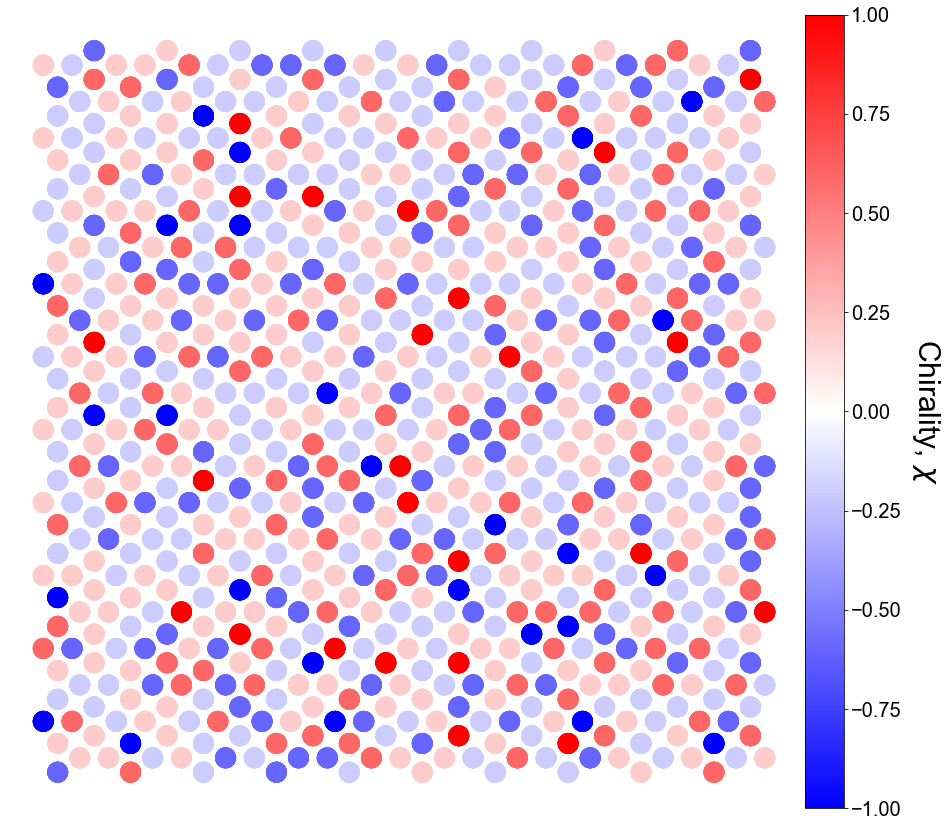

In [9]:
#for i in np.unique(col_trj.index.get_level_values('frame')):
%%time
i = 0
    
pentagons = chi.take_spin_all_pentagons(col_trj, df, frame = i)
new_pentagons = chi.chirality(pentagons);
chi.plot_frame(new_pentagons, name ='ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0_frame-' , frame = str(i))